In [ ]:
'''
COVID-19_exploratory.
Библиотеки.
'''

In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
'''
Загружаем датасет
'''

In [6]:
train = pd.read_csv('COVID-19 Coronavirus.csv',header=None)
train.head()

,0,1,2,3,4,5,6,7,8,9
0,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
1,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743132
2,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275057509
3,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587215976
4,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382270638


In [ ]:
'''
Переименовываем столбцы и удаляем строку.
'''

In [8]:
train.rename(columns={0:'Country', 
                      1:'Other names',
                      2:'ISO',
                      3:'Population',
                      4:'Continent',
                      5:'Total Cases',
                      6:'Total Deaths',
                      7:'TC1Mpop',
                      8:'TD1Mpop',
                      9:'Death percentage'},inplace=True)

train.drop(index=0,inplace=True)

train['Population']=train['Population'].map(int)
train['Total Cases']=train['Total Cases'].map(int)
train['Total Deaths']=train['Total Deaths'].map(int)
train['TC1Mpop']=train['TC1Mpop'].map(int)
train['TD1Mpop']=train['TD1Mpop'].map(int)
train['Death percentage']=train['Death percentage'].map(float)

In [9]:
train.head()

,Country,Other names,ISO,Population,Continent,Total Cases,Total Deaths,TC1Mpop,TD1Mpop,Death percentage
1,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
2,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
3,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
4,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
5,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [ ]:
'''
Убираем альтернативное название и ISO
'''

In [11]:
train=train.drop(['Other names','ISO'],axis=1)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 1 to 225
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           225 non-null    object 
 1   Population        225 non-null    int64  
 2   Continent         225 non-null    object 
 3   Total Cases       225 non-null    int64  
 4   Total Deaths      225 non-null    int64  
 5   TC1Mpop           225 non-null    int64  
 6   TD1Mpop           225 non-null    int64  
 7   Death percentage  225 non-null    float64
dtypes: float64(1), int64(5), object(2)
memory usage: 14.2+ KB


In [ ]:
'''
Статистика
'''

In [13]:
train.describe()

,Population,Total Cases,Total Deaths,TC1Mpop,TD1Mpop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


In [14]:
train.columns

Index(['Country', 'Population', 'Continent', 'Total Cases', 'Total Deaths',
       'TC1Mpop', 'TD1Mpop', 'Death percentage'],
      dtype='object')

In [15]:
columns=['Population', 'Total Cases', 'Total Deaths',
       'TC1Mpop', 'TD1Mpop', 'Death percentage']

In [ ]:
'''
Антирейтинг борьбы с ковидом
С помощью функции nlargest() выделим пять верхних стран по рейтингам для каждой колонки.
'''

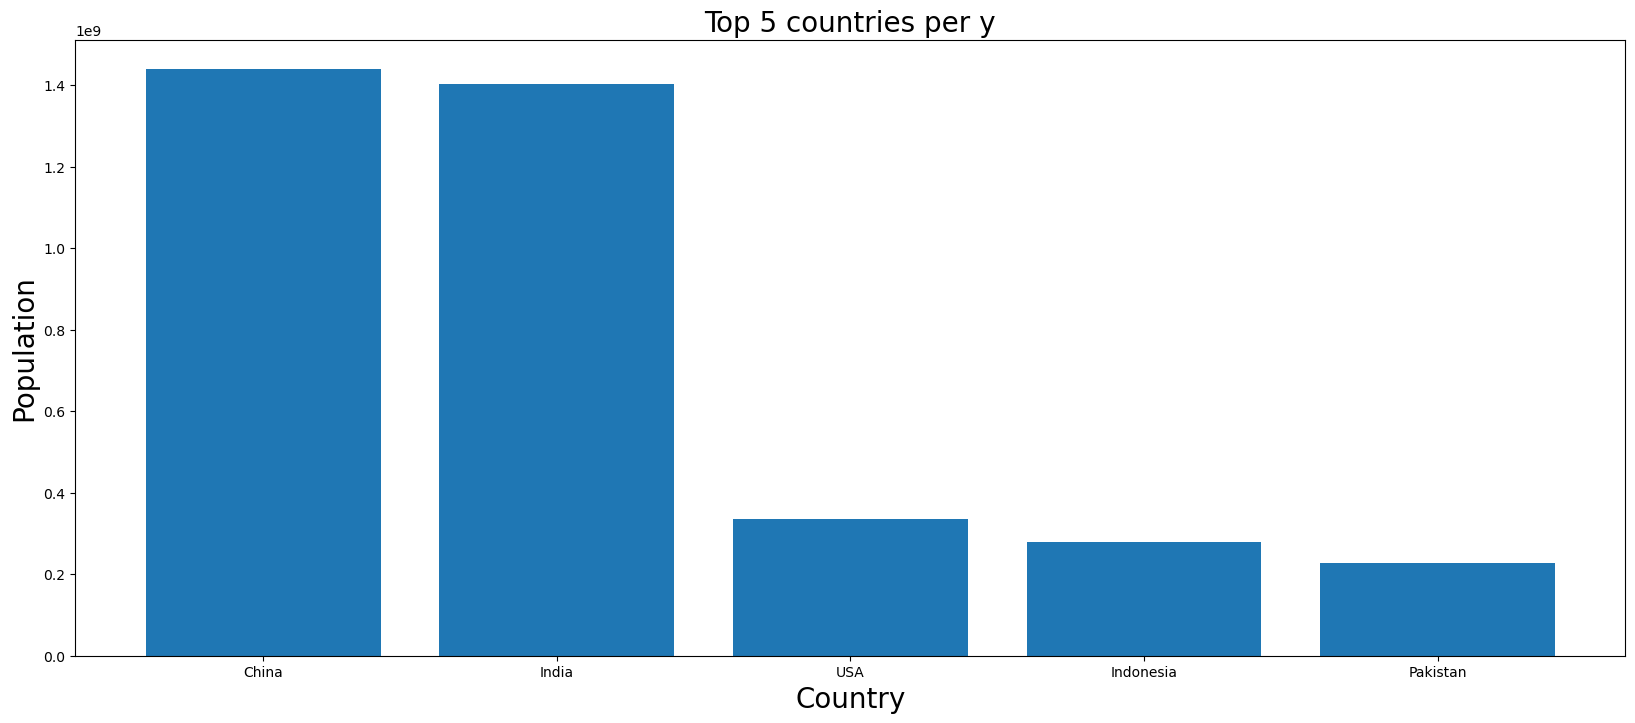

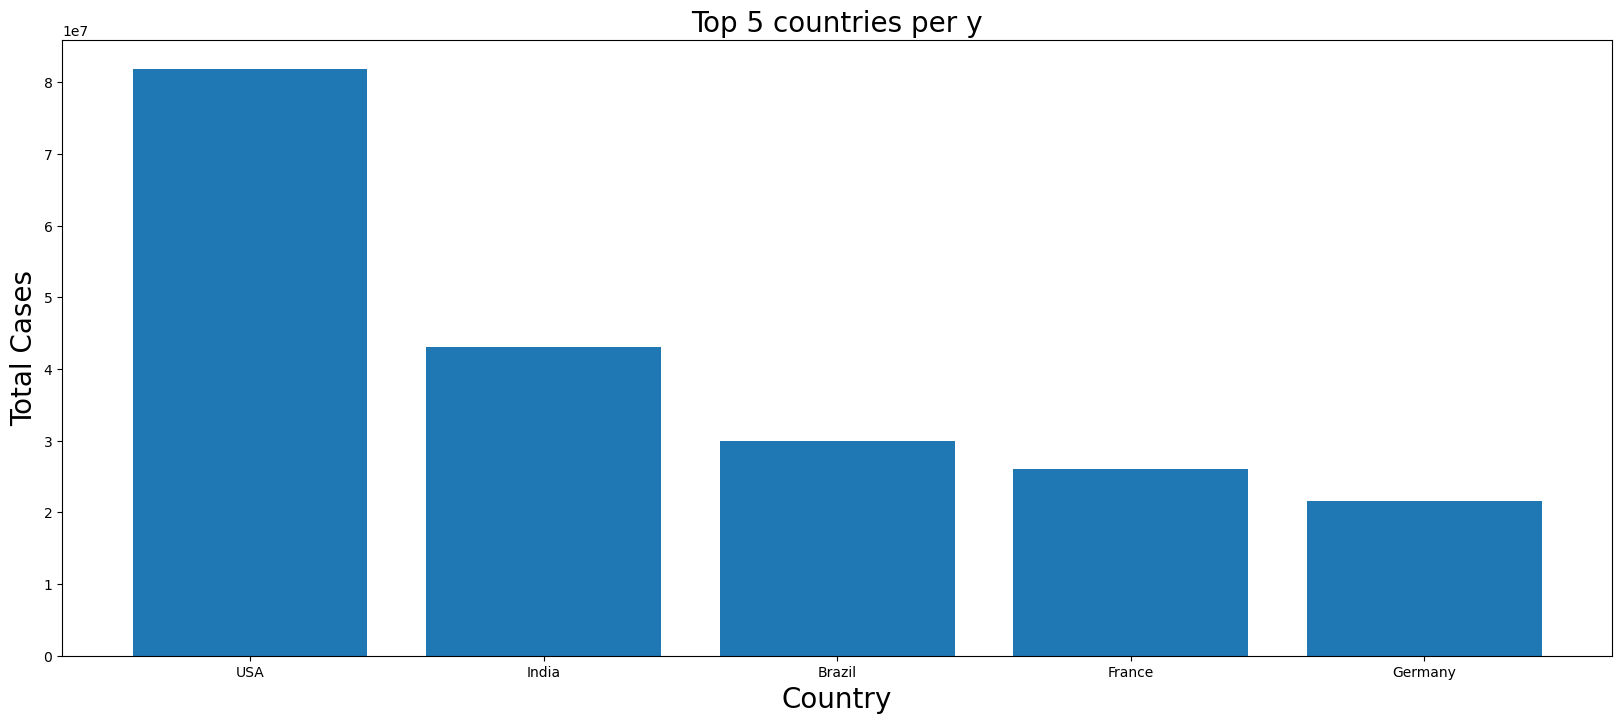

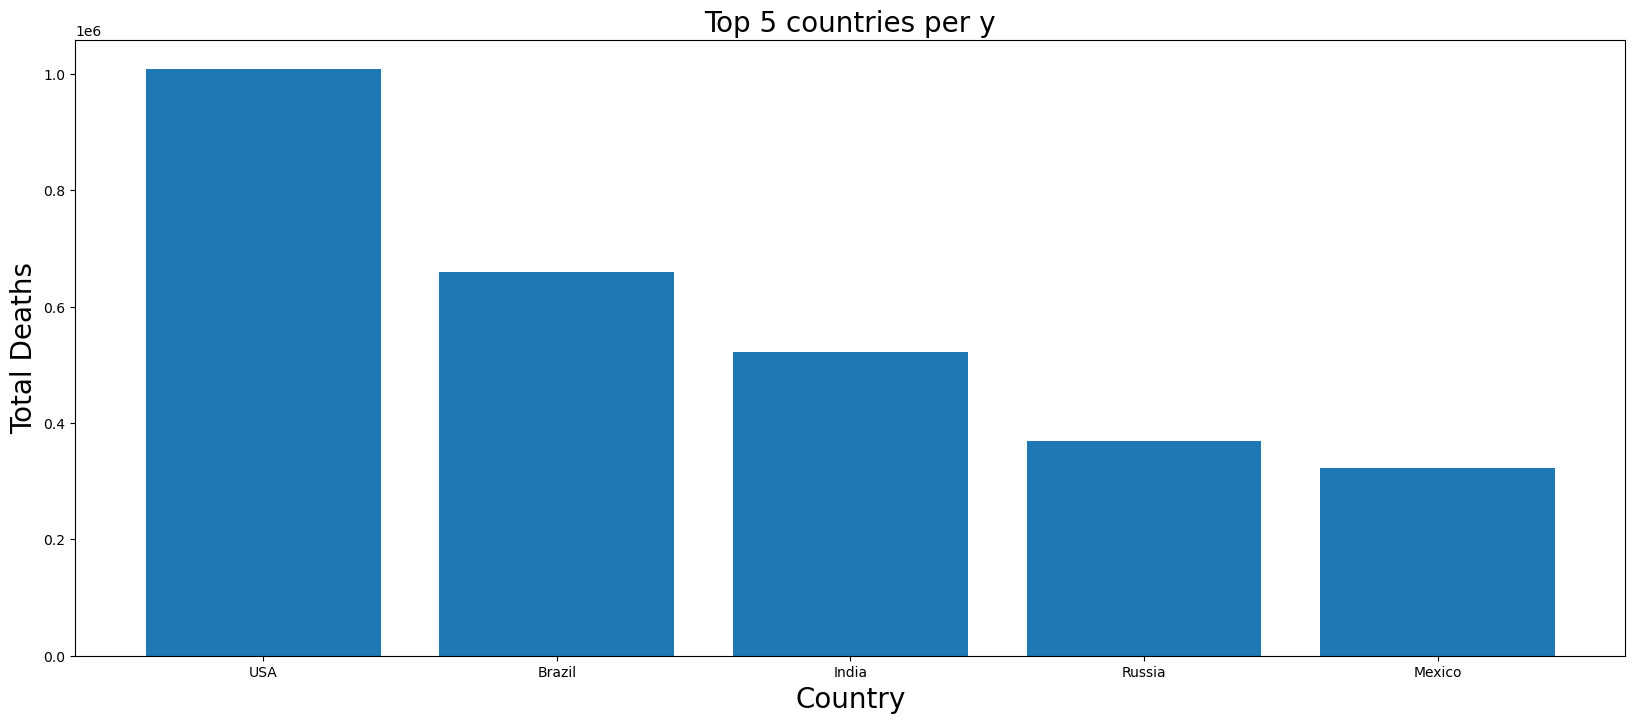

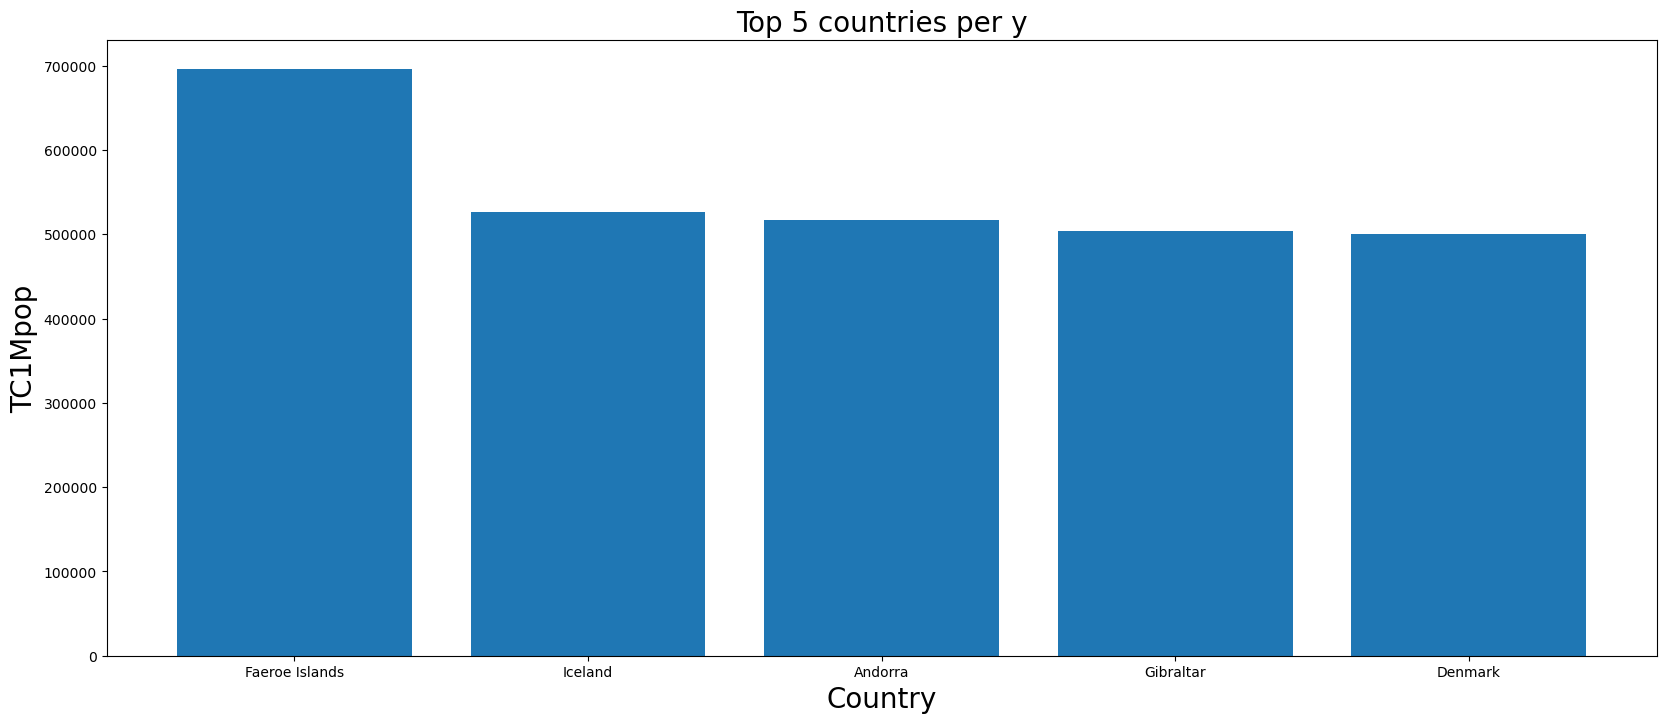

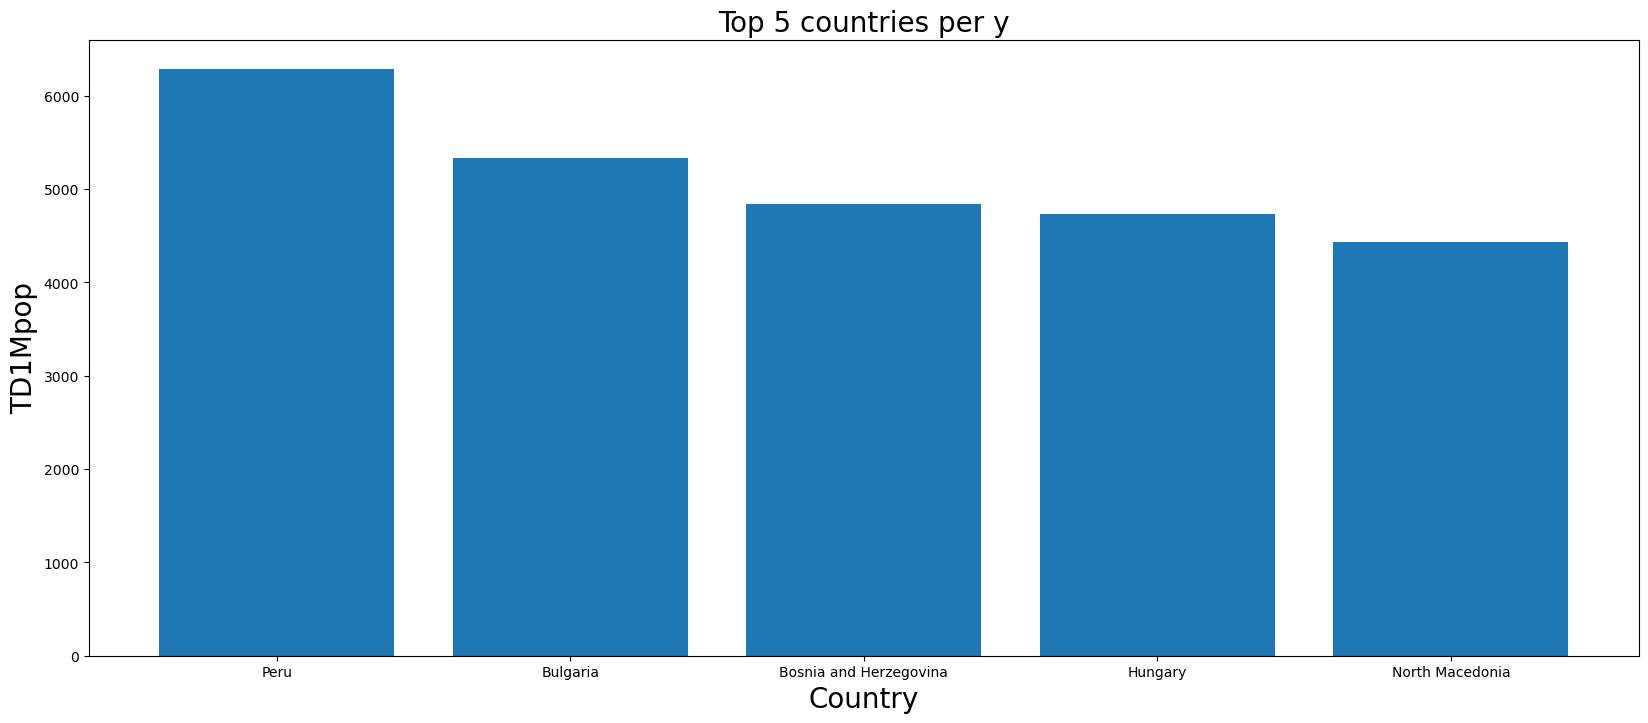

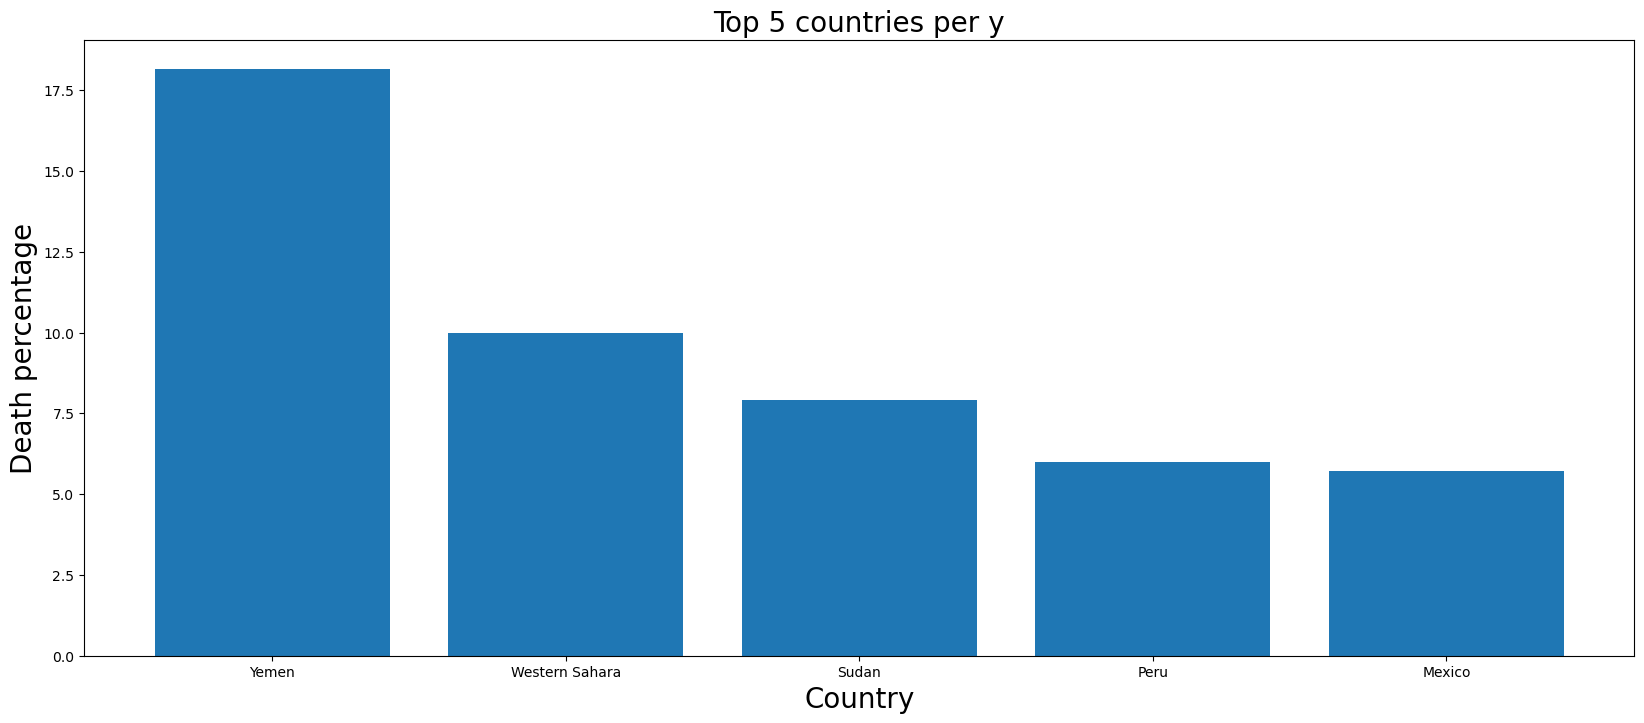

In [16]:
for column in columns:
  top5 = train.nlargest(5,column)
  plt.figure(figsize=(20,8))
  plt.bar(top5['Country'], top5[column])
  plt.ylabel(column, fontsize = 20)
  plt.xlabel("Country", fontsize = 20)
  plt.title("Top 5 countries per y", fontsize = 20)
  plt.show()

In [ ]:
'''
Посмотрим на страны, наименее затронутые ковидом.
С помощью функции nsmallest().
'''

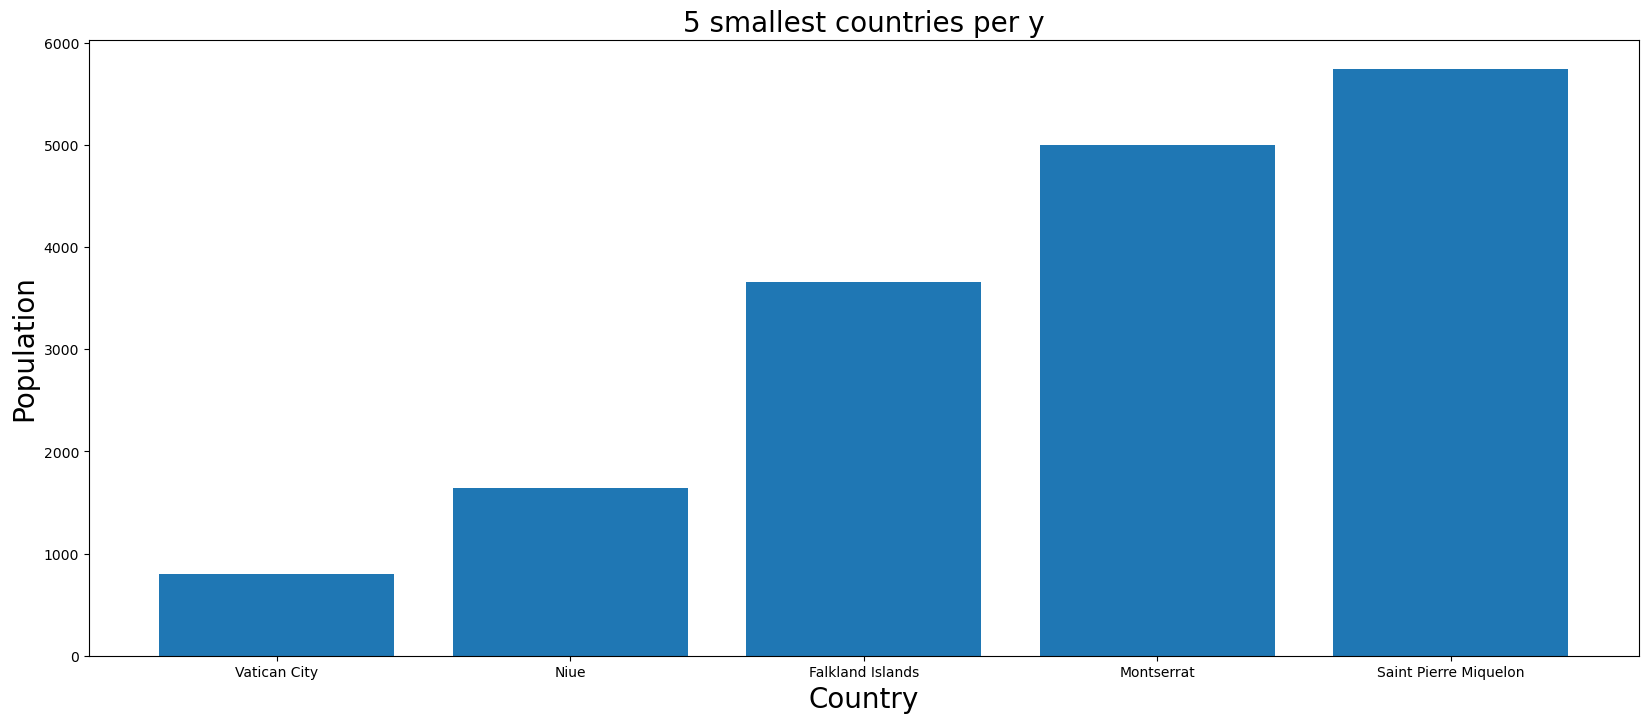

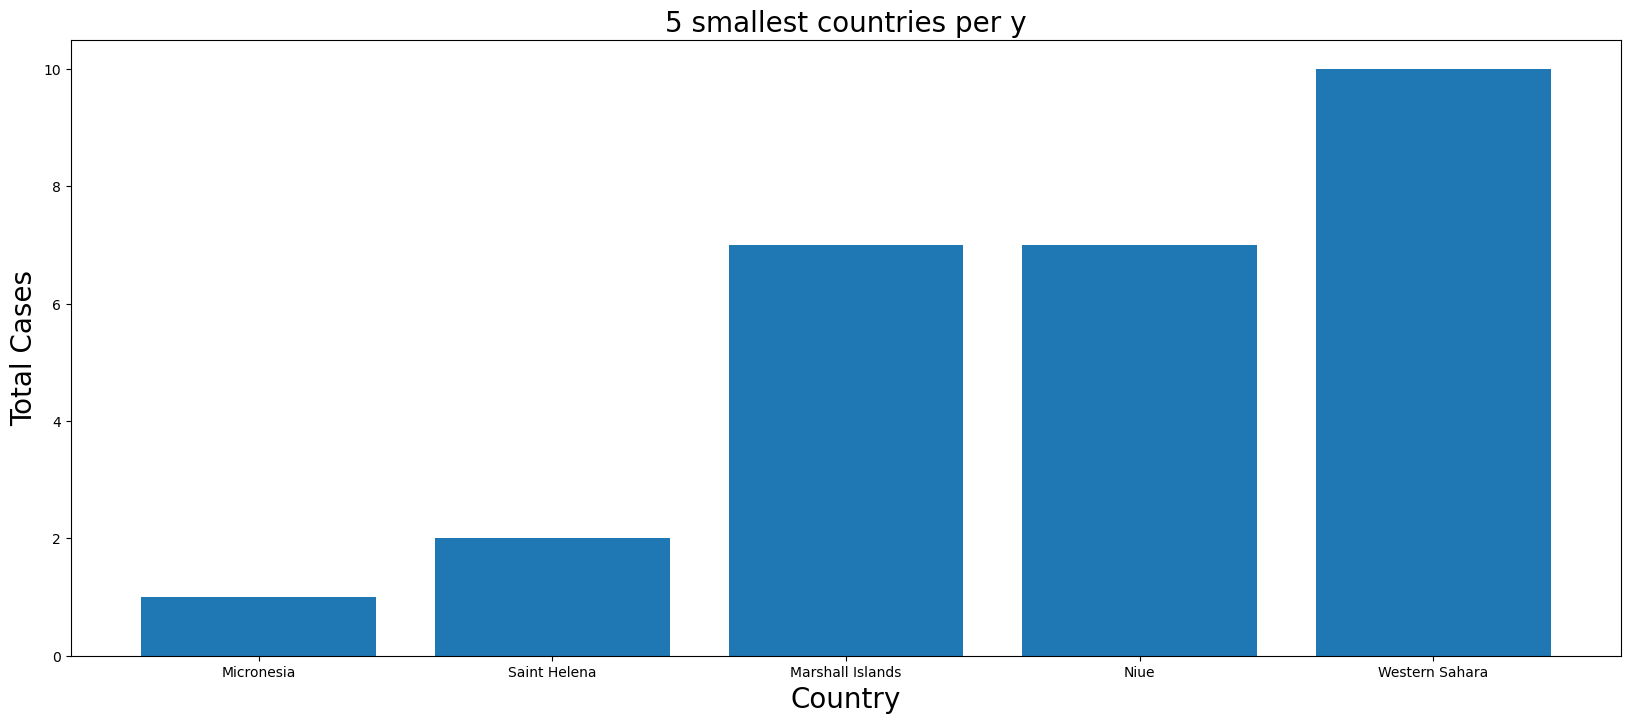

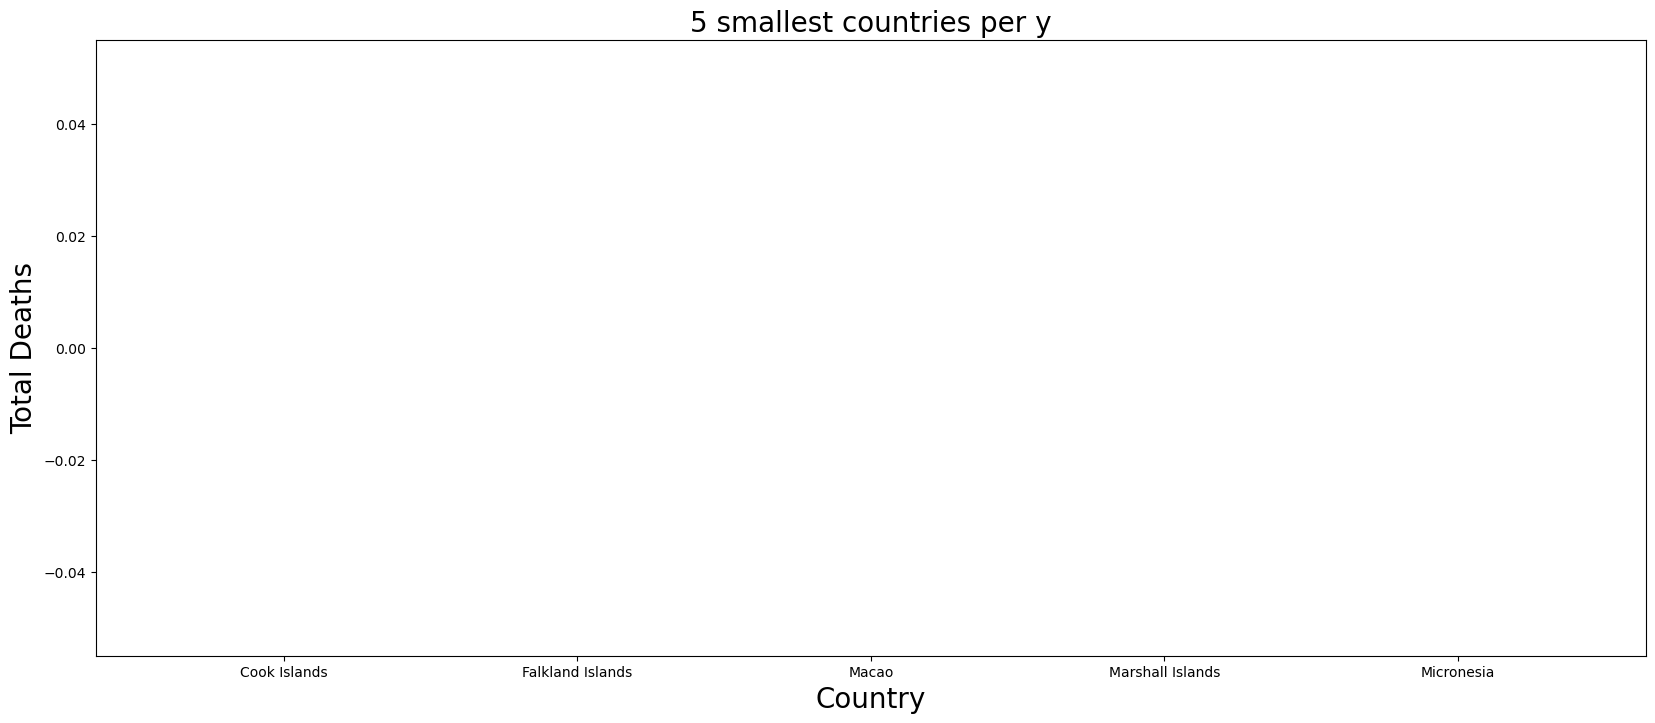

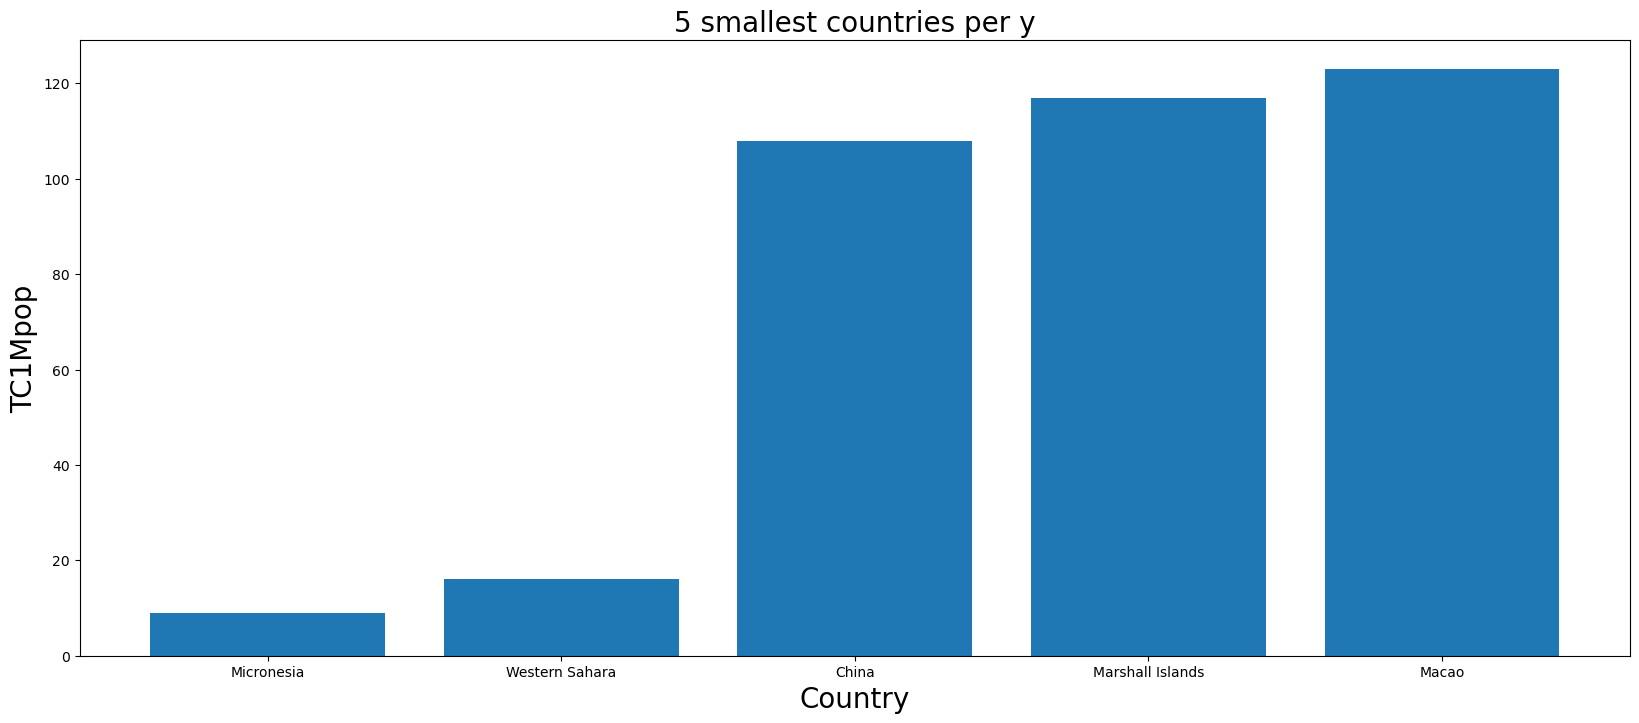

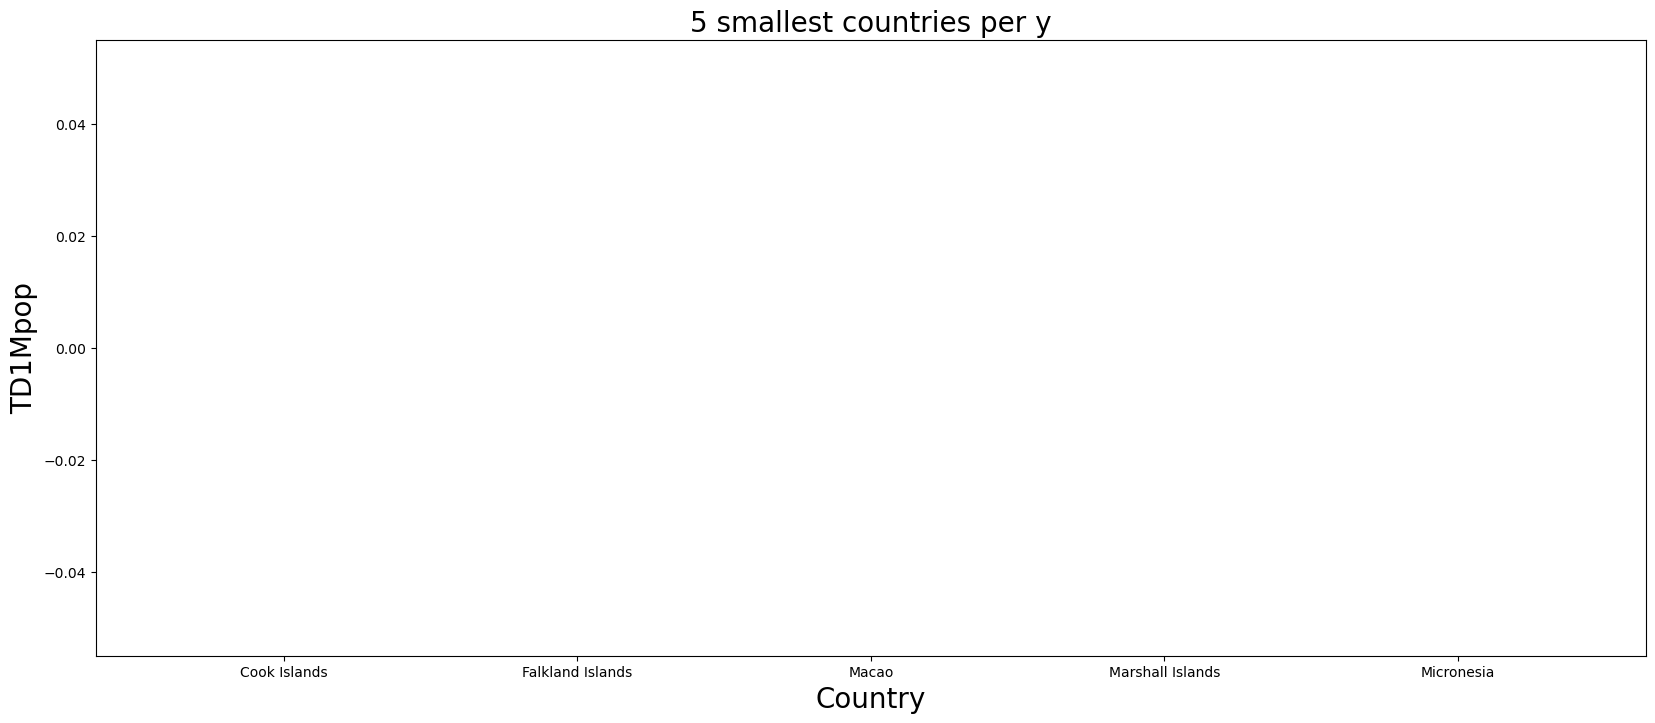

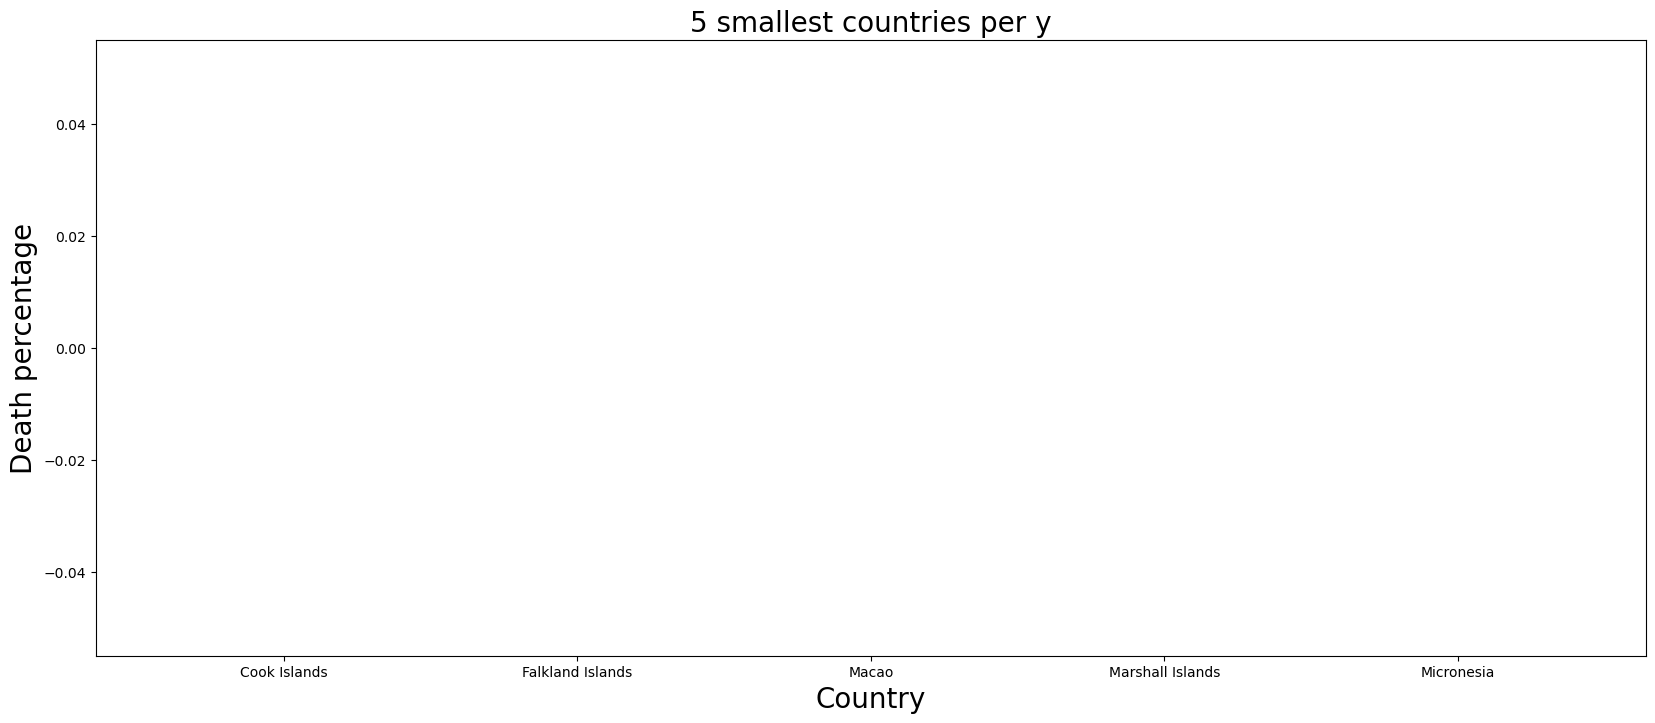

In [18]:
for column in columns:
  top5 = train.nsmallest(5,column)
  plt.figure(figsize=(20,8))
  plt.bar(top5['Country'], top5[column])
  plt.ylabel(column, fontsize = 20)
  plt.xlabel("Country", fontsize = 20)
  plt.title("5 smallest countries per y", fontsize = 20)
  plt.show()

In [ ]:
'''
Составим, по различным показателям, антирейтинг европейских стран.
'''

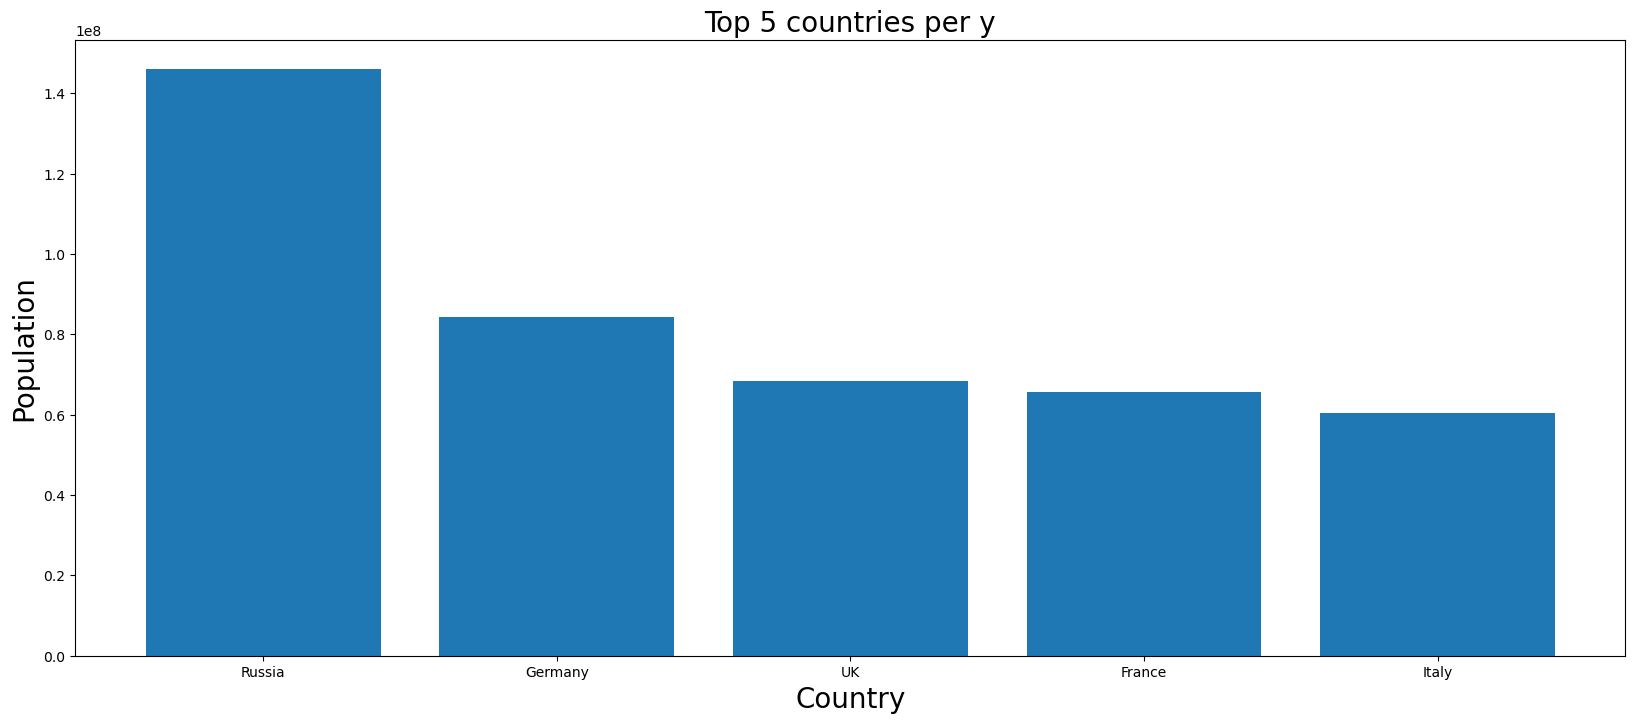

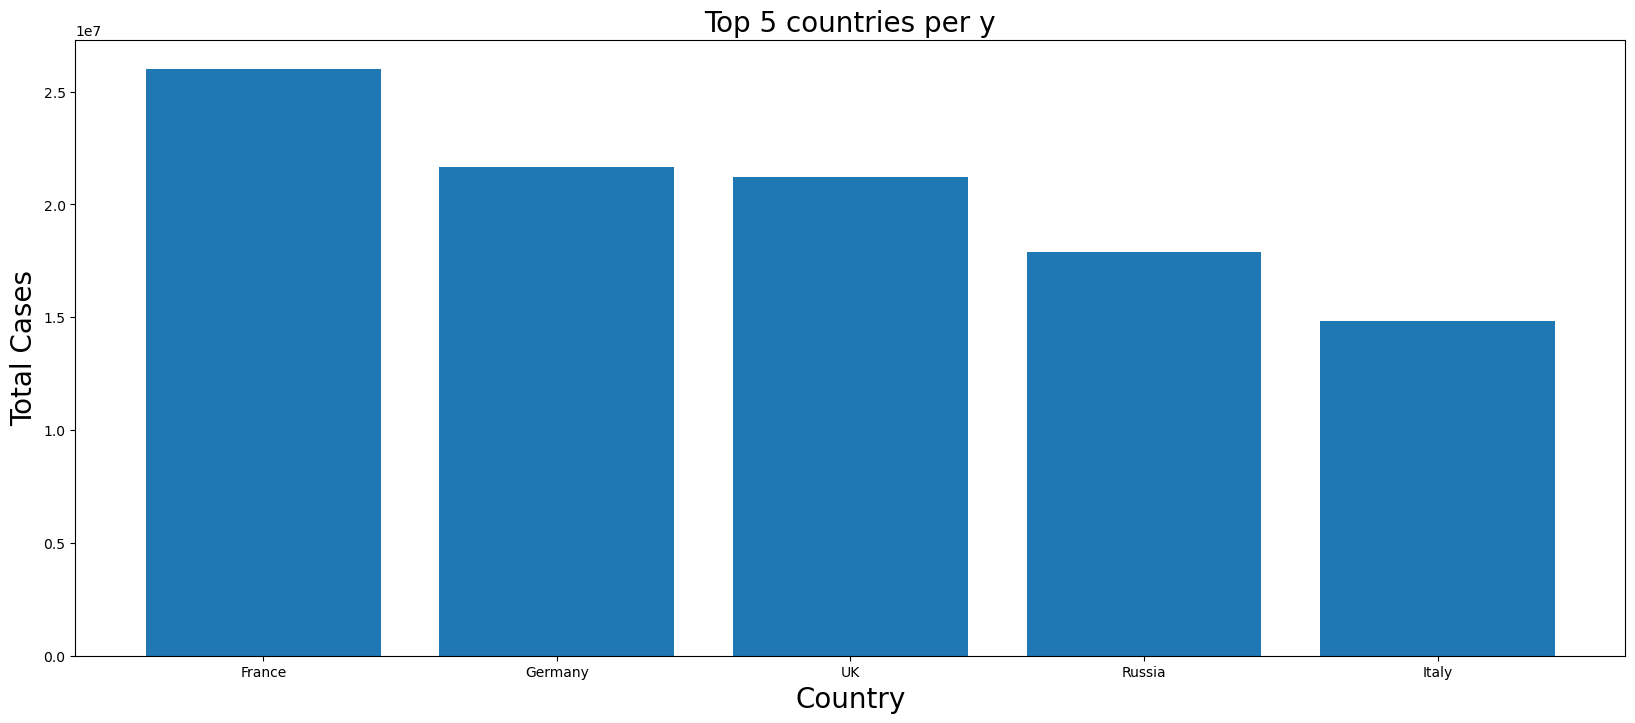

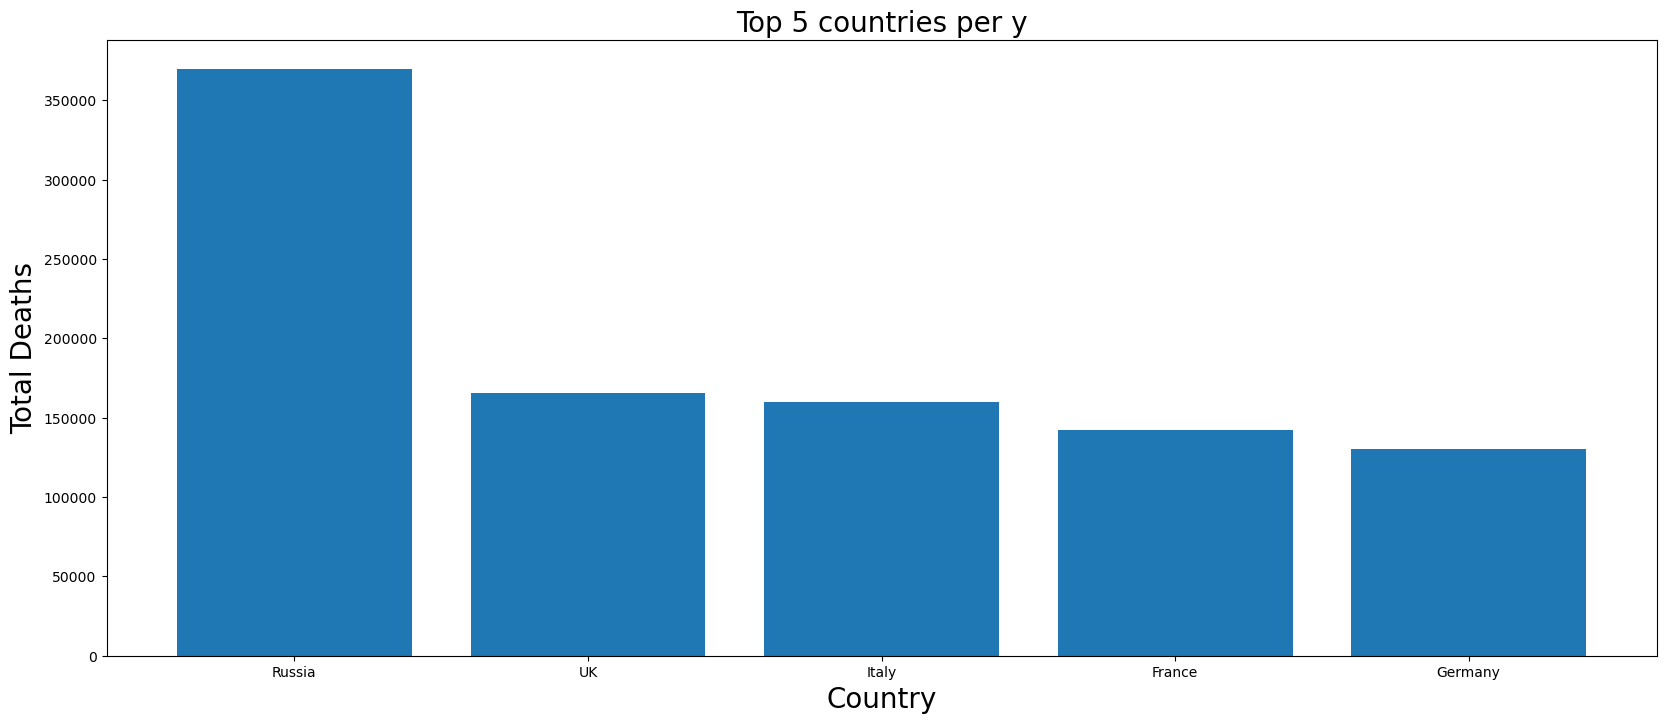

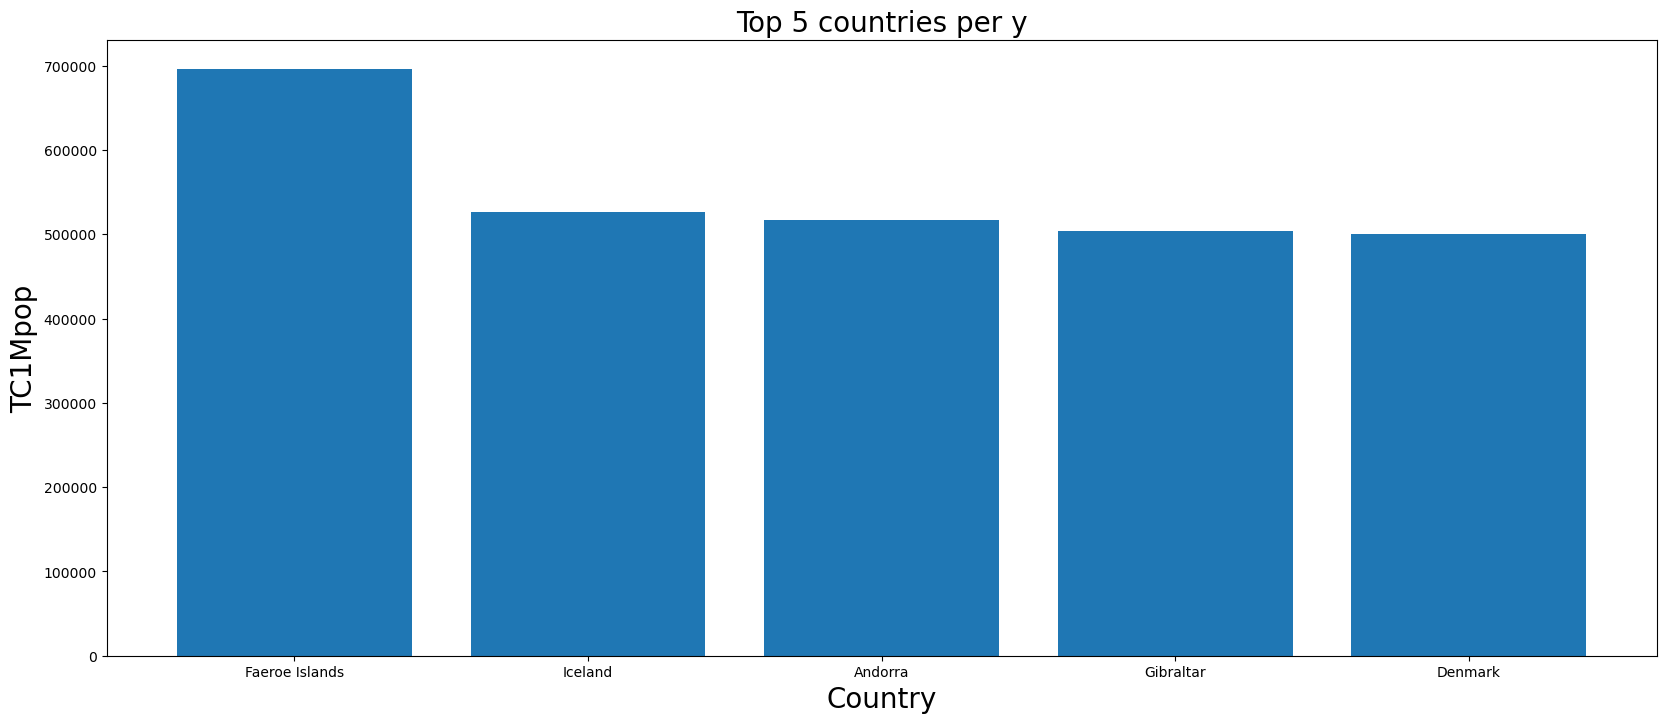

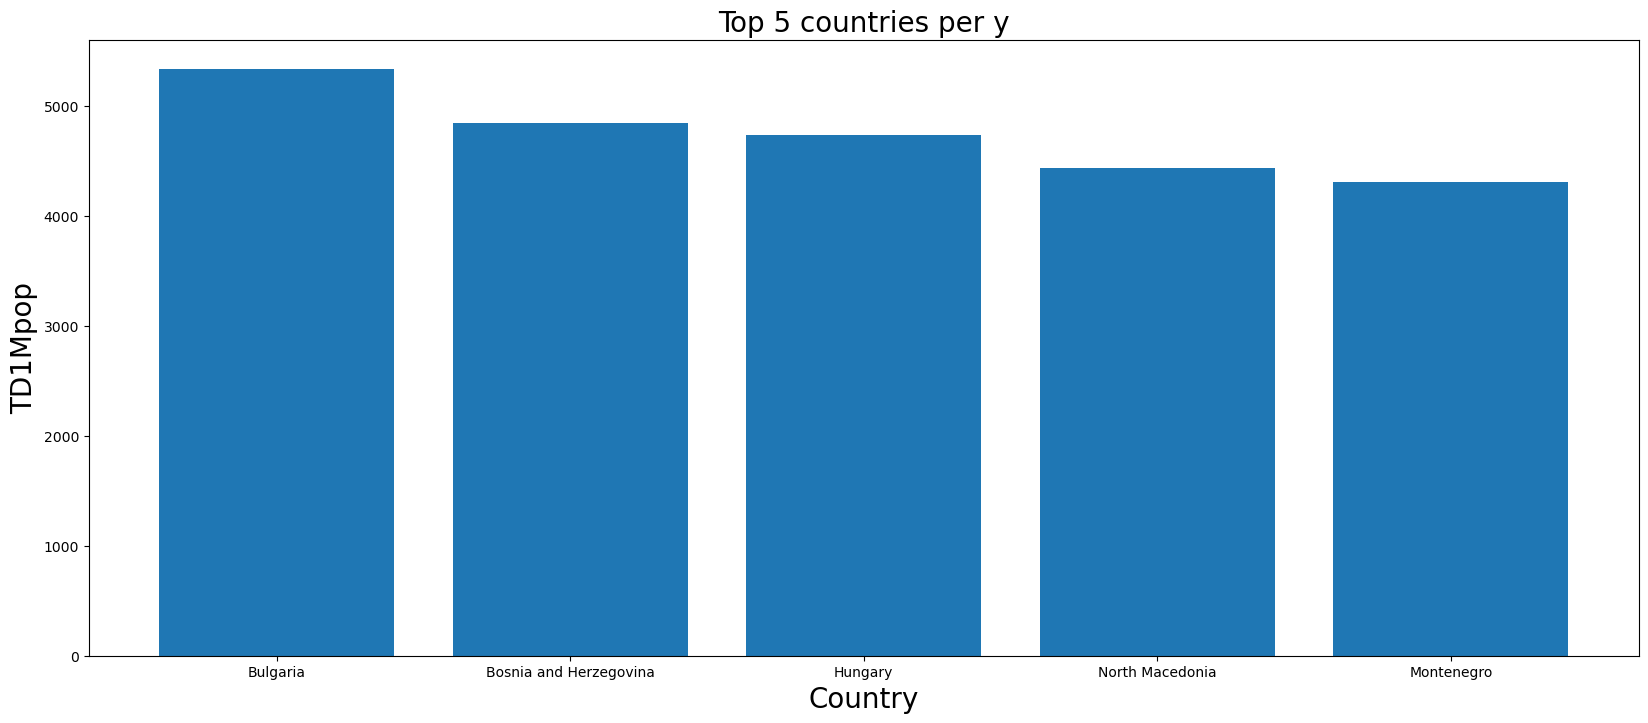

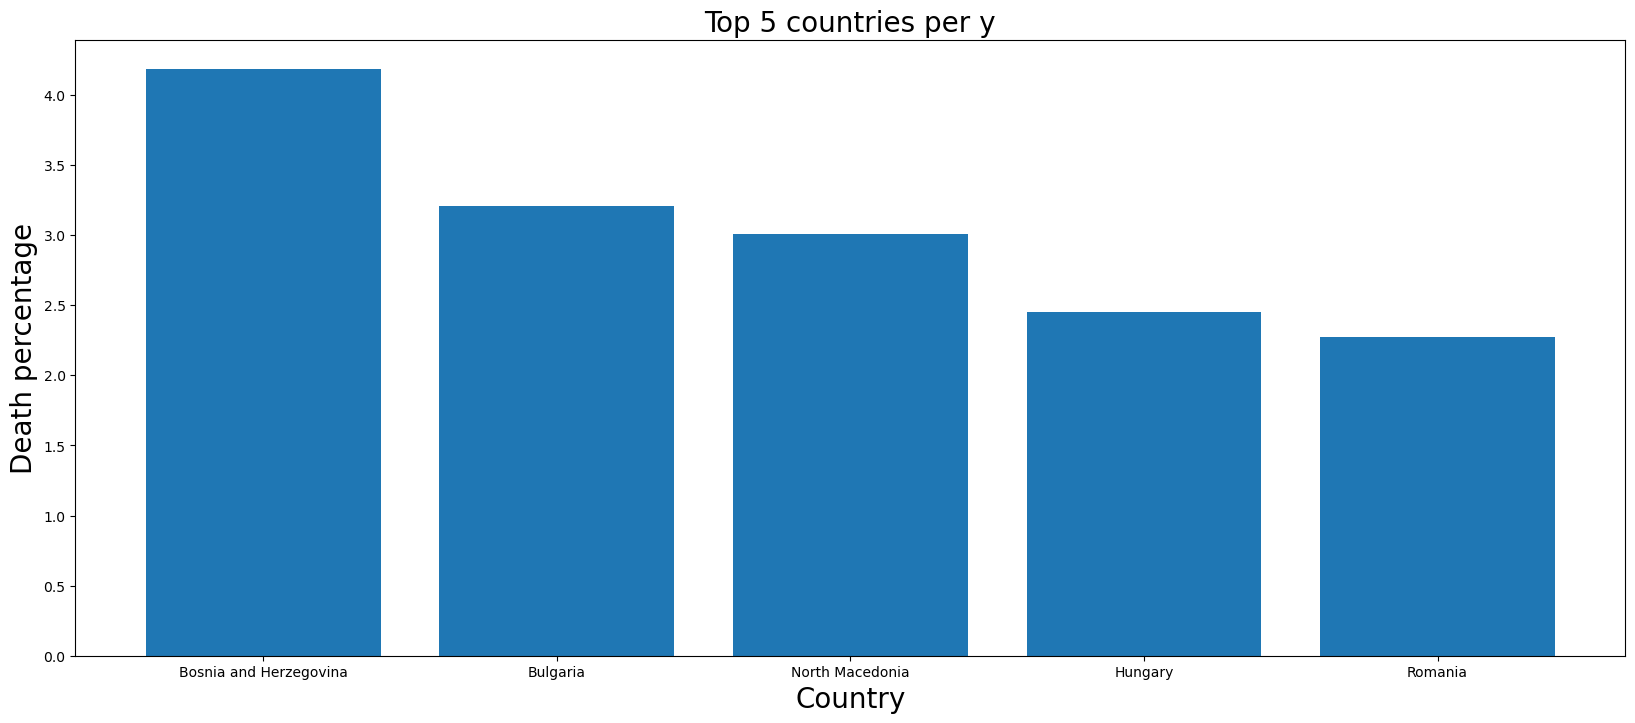

In [20]:
Europe=train[train['Continent']=='Europe']

for column in columns:
  top5 = Europe.nlargest(5,column)
  plt.figure(figsize=(20,8))
  plt.bar(top5['Country'], top5[column])
  plt.ylabel(column, fontsize = 20)
  plt.xlabel("Country", fontsize = 20)
  plt.title("Top 5 countries per y", fontsize = 20)
  plt.show()

In [ ]:
'''
Проанализируем взаимодействие переменных
'''

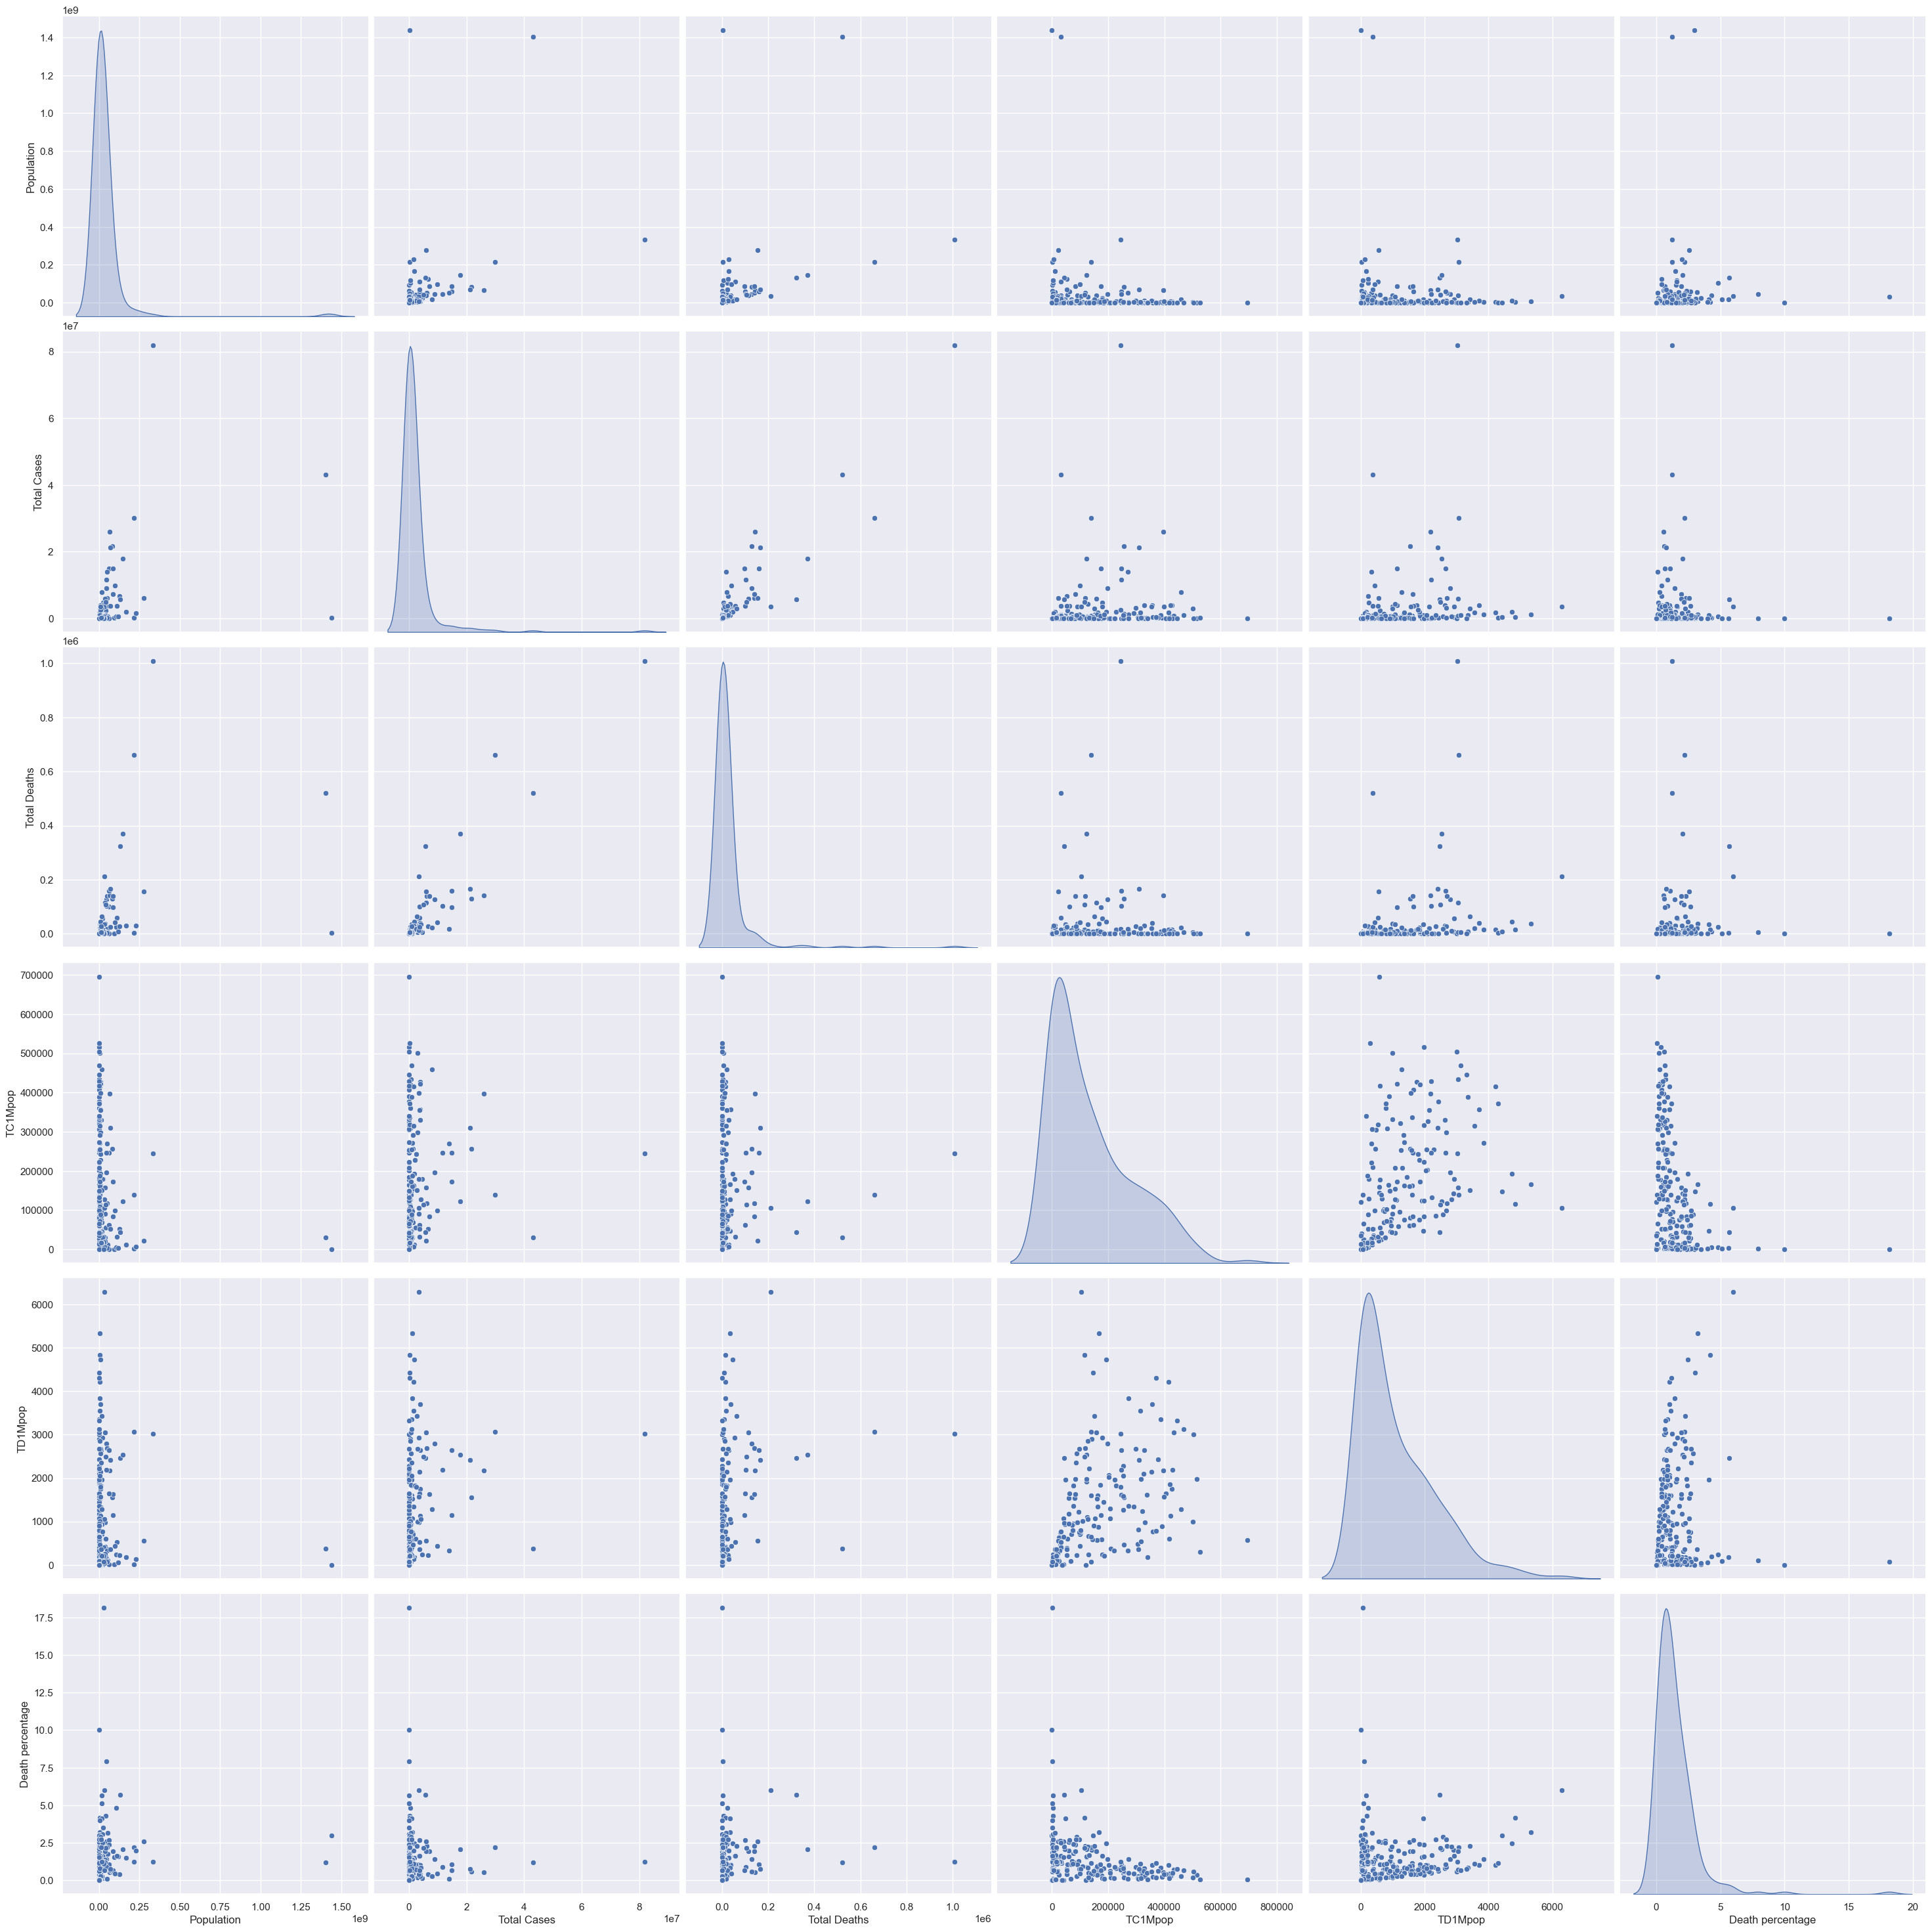

In [21]:
sns.set()
sns.pairplot(train[columns],height = 5 ,kind ='scatter',diag_kind='kde')
plt.show()

In [ ]:
'''
Из представленных графиков можно сделать вывод, что ситуация была похожей в большинстве стран.
'''

In [ ]:
'''
Проанализируем выбросы
'''

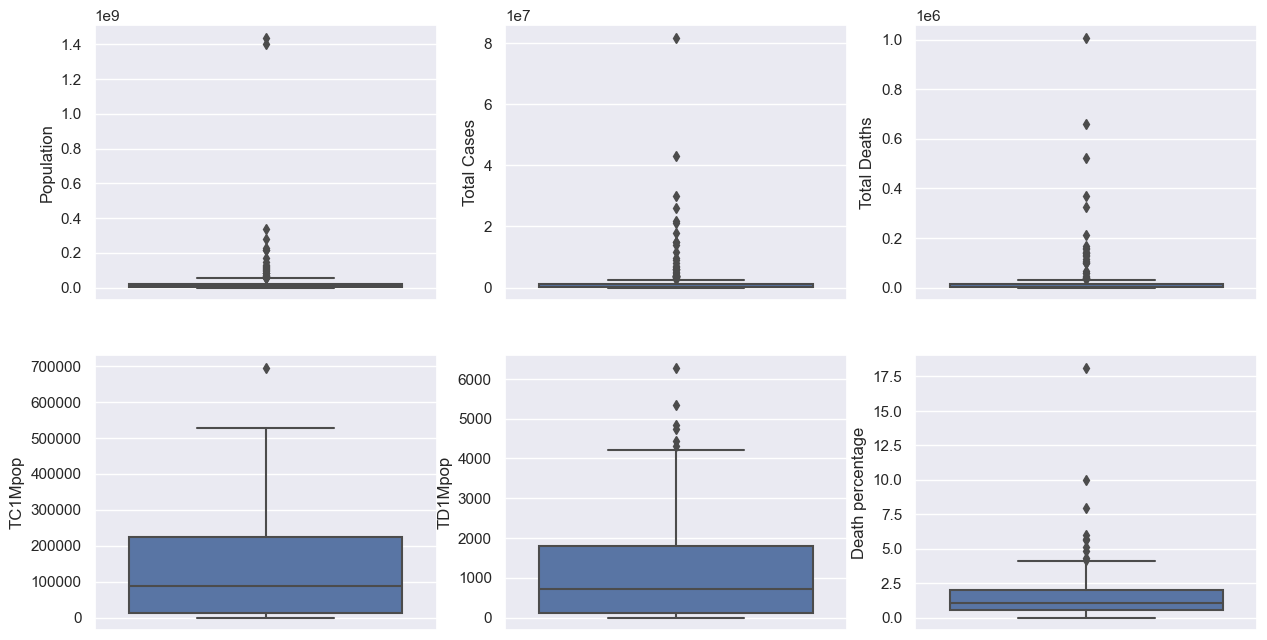

In [22]:
i=1
plt.figure(figsize=(15,25))
for feature in columns:
    plt.subplot(6,3,i)
    sns.boxplot(y=train[feature])
    i+=1

In [ ]:
'''
Из представленных графиков следует, что выбросов информации немного, но они присутствуют. 
При работе с выбросами важно отличать выбросы от уникальной информации.
Так на боксплоте Population два верхних выброса относятся к Индии и Китаю, составляя примерно 2,8 миллиарда человек.
'''

In [ ]:
'''
Построим таблицу корреляции, исходя из смертности на один миллион населения.
'''

In [23]:
correlation = train.corr()
print(correlation['TD1Mpop'].sort_values(ascending = False),'\n')

TD1Mpop             1.000000
TC1Mpop             0.508630
Total Deaths        0.289201
Total Cases         0.216272
Death percentage    0.061088
Population         -0.066485
Name: TD1Mpop, dtype: float64 



Index(['TD1Mpop', 'TC1Mpop', 'Total Deaths', 'Total Cases', 'Death percentage',
       'Population'],
      dtype='object')


C:\Users\Luther\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\Luther\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


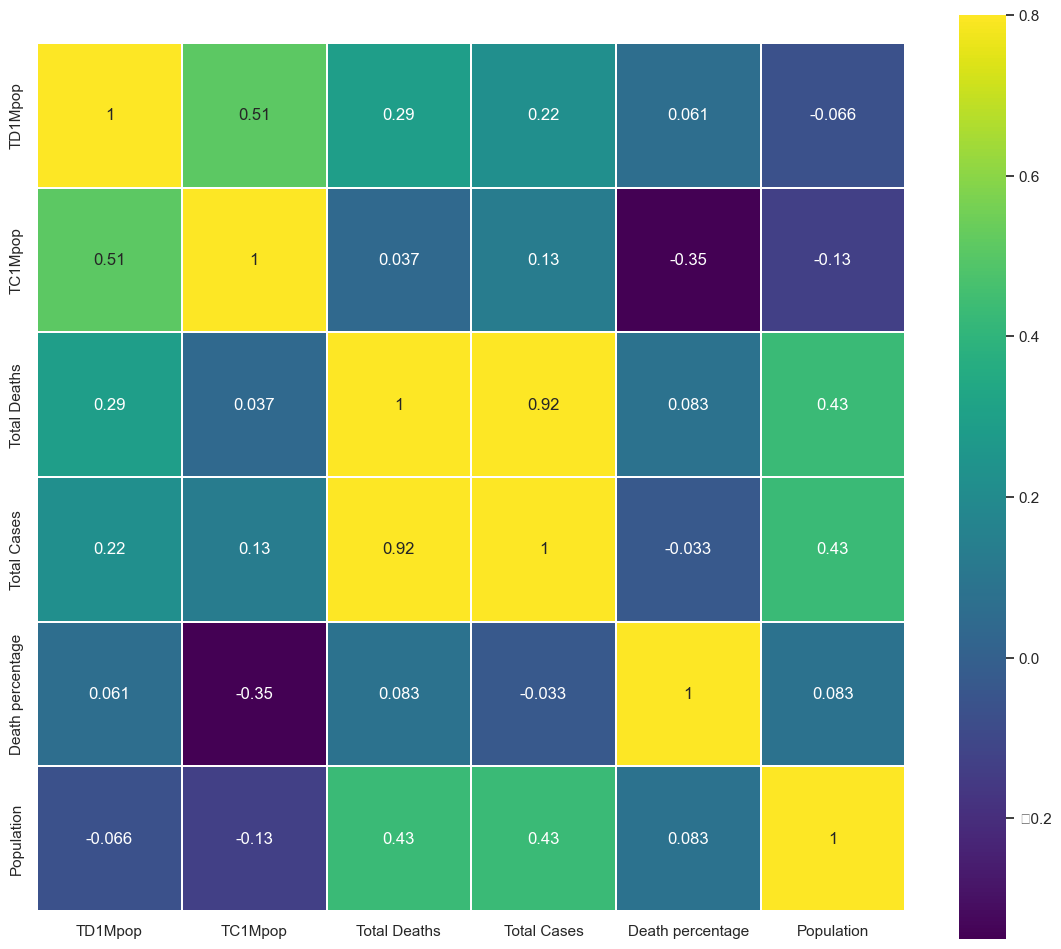

In [24]:
k= 10
cols = correlation.nlargest(k,'TD1Mpop')['TD1Mpop'].index
print(cols)
cm = np.corrcoef(train[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)
plt.show()

In [ ]:
'''
Показатели количества заболевших и смертности от ковида коррелируются с коэфициентом 0.92.
Преобразуем таблицу для кластерного анализа.
Удалить переменную континента и сделаем индексом страну.
'''

In [ ]:
train = train.drop(['Continent'],axis=1).set_index('Country')

In [33]:
train

,Population,Total Cases,Total Deaths,TC1Mpop,TD1Mpop,Death percentage
Country,,,,,,
Afghanistan,40462186,177827,7671,4395,190,4.313743
Albania,2872296,273870,3492,95349,1216,1.275058
Algeria,45236699,265691,6874,5873,152,2.587216
Andorra,77481,40024,153,516565,1975,0.382271
Angola,34654212,99194,1900,2862,55,1.915438
...,...,...,...,...,...,...
Wallis and Futuna,10894,454,7,41674,643,1.541850
Western Sahara,623031,10,1,16,2,10.000000
Yemen,30975258,11806,2143,381,69,18.151787


In [ ]:
'''
Кластерный анализ.
Преобразуем данные в формат [0, 1]
'''

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()
names = train.columns
d = scaler.fit_transform(train)

scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,Population,Total Cases,Total Deaths,TC1Mpop,TD1Mpop,Death percentage
0,0.028111,0.002173,0.007608,0.006301,0.030226,0.237648
1,0.001995,0.003346,0.003464,0.136976,0.193446,0.070244
2,0.031429,0.003246,0.006818,0.008425,0.024181,0.142532
3,0.000053,0.000489,0.000152,0.742141,0.314190,0.021060
4,0.024076,0.001212,0.001885,0.004099,0.008750,0.105523


C:\Users\Luther\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


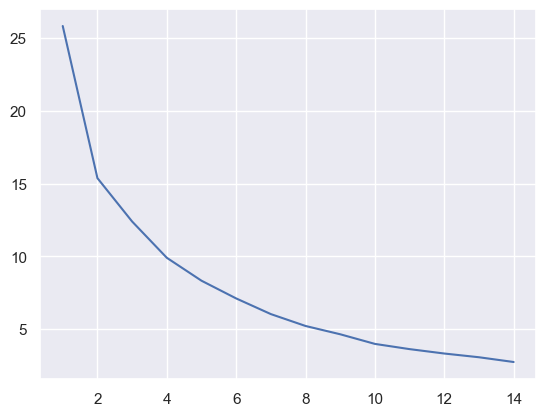

In [36]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,15):
    km = KMeans(n_clusters=i)
    km.fit_predict(scaled_df)
    wcss.append(km.inertia_)
plt.plot(range(1,15),wcss)
plt.show()

In [ ]:
'''
В точке 4 видим перегиб графиика. Критическая точка - 4.
'''

In [ ]:
'''
Так как данных немного, то и обработки выбросов не будет.
Но покажем, как можно быстро обработать выбросы с помощью метода LocalOutlierFactor. 
Изменяя параметры метода, мы можем контролировать количество удаляемых выбросов.
'''

In [37]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=10, contamination='auto')
y_pred = clf.fit_predict(train) 

train['Out']=y_pred

Out=train[train['Out']!=1]

In [38]:
Out.shape

(11, 7)

In [39]:
Out

,Population,Total Cases,Total Deaths,TC1Mpop,TD1Mpop,Death percentage,Out
Country,,,,,,,
Brazil,215204501,29999816,660269,139401,3068,2.200910,-1
China,1439323776,154738,4638,108,3,2.997325,-1
Denmark,5827911,2919428,5762,500939,989,0.197367,-1
Faeroe Islands,49188,34237,28,696044,569,0.081783,-1
France,65526369,25997852,142506,396754,2175,0.548145,-1
India,1403754381,43029044,521388,30653,371,1.211712,-1
Indonesia,278586508,6019981,155288,21609,557,2.579543,-1
Netherlands,17201245,7908701,22016,459775,1280,0.278377,-1
Nigeria,215077352,255468,3142,1188,15,1.229900,-1


In [ ]:
'''
Интересно, что в выбросы попали самые крупные страны. И средние с небольшими, с большим числом заболевши.
Вроозможно дело в медицине и прозрачной статистике в этих странах.
'''